In [1]:
"""4.2.2 Example: Image processing with NumPy
In the following example, we use the NumPy library for image processing. In a computer, an
image is typically stored as a three-dimensional numerical array. The height of the image
corresponds to the y-axis and the width of the image to the x-axis (note that the position
(0, 0) is in the upper left corner). The third dimension refers to for example the red, green,
or blue channel in an RGB colour image (a black and white or grayscale gure has only two
dimensions; other colour models, such as CMYK, would have a dierent meaning for the
third dimension). We load two functions from the scikit-image library that are specic to
image analysis. The rst function, io.imread, reads an image as a NumPy array; the second
function, io.imshow, is used to visualise an image. All other functions in this example are
part of the NumPy library.
To get started, load NumPy and the input/output function of skimage (short for scikit-image)
into your notebook:"""

import numpy as np
import skimage.io as io
# make matplotlib image plotting available inside the noteboook
%matplotlib inline

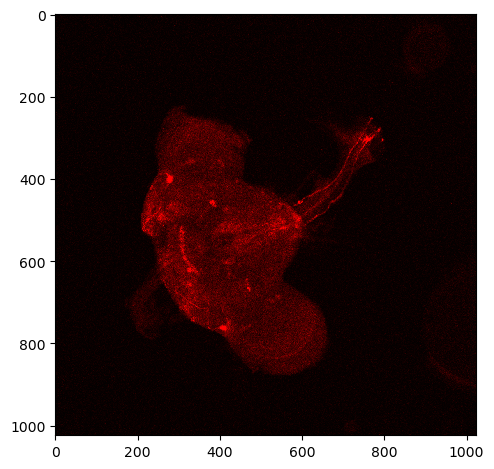

In [2]:
# Coupled to a reporter gene, NPF and NPFR1 can be visualised by confocal microscopy.
# Let's load one of the images of the study:
# load and show the image using the io library
# assuming that you're working in scientific/sandbox
image = io.imread("./data/Kacsoh2013_Drosobrain.png")
io.imshow(image)

In [3]:
# We can use NumPy's array methods to retrieve information about the image:
image.shape

(1024, 1024, 4)

In [10]:
# We see that our image measures 1024 x 1024 pixels and has three dimensions. The
# third dimension contains information on each RGB colour channel and each pixel's alpha
# (opacity) value. Let's look at individual channels and calculate some statistics:
# Extract the red channel:
red = image[:,:,0]
red.mean()
red.std()
red.min()
red.max()


255

In [12]:
# extract the green channel
green = image[:,:,1]
green.mean()

0.0

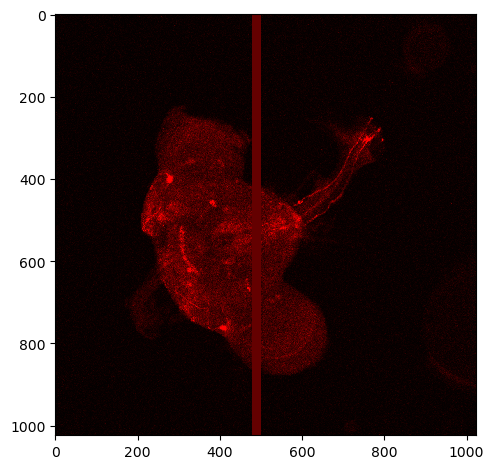

In [14]:
# Let's count how many pixels are red (i.e., how many pixels display NPF and NPFR1 ex-
# pression). While there are sophisticated methods to determine the background of an image,
# here we take the simplest approach and choose an arbitrary threshold of 100 (i.e., intensities
# below 100 are considered noise, all pixels with a value above this threshold are considered
# "red" or "expressed"). We can visually inspect how this threshold compares to the rest of
# the image by setting a part of our picture to 100:
# Create a copy of the image:
img_copy = image.copy()
# use python slicing to change colour values of the red channel in the image
img_copy[:, 480:500, 0] = 100
io.imshow(img_copy)

37037

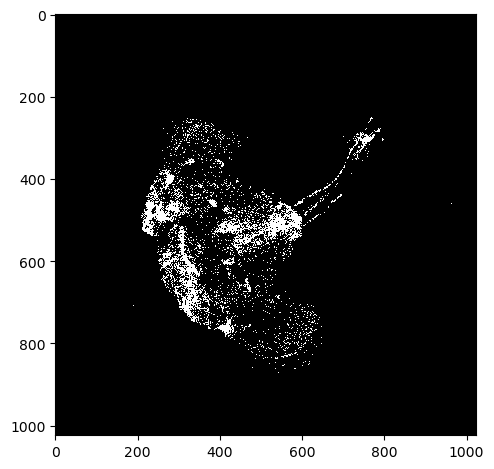

In [16]:
# We now create a new array where we select only pixels that exceed the threshold,
# and then count their number
threshold = 100
# create mask - an array of booleans that determines if pixel intensisty of
# red channel is above threshold
mask = red > threshold
# as True == 1 and False == 0, we can plot the mask (zero is black, one is white)
io.imshow(mask)
# sum of mask array (i.e., number of ones) equals number of pixels
# with NPF/NPFR1 expression
mask.sum()

4855070

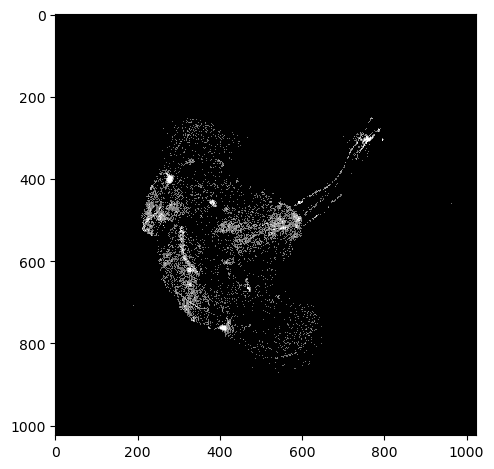

In [20]:
# Using the mask (i.e., setting every pixel to either 0 or 1), we lost the information on the
# intensity of individual pixels (i.e., strength of expression signal). However, we can show the
# pixels above the threshold along with their intensity by calling:
mask2 = red * (red > threshold)
io.imshow(mask2)
mask2.sum()
# Using NumPy arrays, we obtained a quantitative measure of NPF/NPFR1 expression
# from confocal images that could, for example, be used to compare dierent treatments or
# genetic lineages of D. melanogaster.